<h2>Magnitude Explorartory Analysis

In [1]:
#libraries

import os
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn import decomposition
from sklearn import preprocessing
from sklearn import manifold
from sklearn import metrics
from tqdm.auto import tqdm
from joblib import Parallel, delayed
import urllib.request
import shutil
import zipfile
import utils
from scipy.stats import gaussian_kde


pd.options.display.max_rows = 999
pd.options.display.max_colwidth = None

# For reproducibility
np.random.seed(42)
N_JOBS = 2


/home/hrs675/Wearables_Tokenizer/.venv/lib64/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#read magnitude data
all_M= pd.read_csv("/data/UKBB/kyra/capture24_magnitude_flat.csv")
print(all_M.head())


   Magnitude
0   0.991604
1   0.991604
2   0.992640
3   0.991604
4   0.991604


In [3]:
all_M_norm = all_M - 1

In [4]:
labels_time_df= pd.read_csv("/data/UKBB/kyra/capture24_all_labels_times.csv")

In [5]:
all_Y= np.repeat(labels_time_df['label'], 100)

In [6]:
all_Y = all_Y.reset_index(drop=True)

In [7]:
#random 20% sample


# Take a random sample of 20% of the data
sample_frac = 0.2
sample_idx = np.random.choice(all_M_norm.index, size=int(len(all_M_norm) * sample_frac), replace=False)

all_M_norm_sample = all_M_norm.iloc[sample_idx].reset_index(drop=True)
all_Y_sample = np.array(all_Y)[sample_idx]


<h4>Magnitude Distribution

In [8]:
from utils import get_most_frequent_bin, calculate_statistics


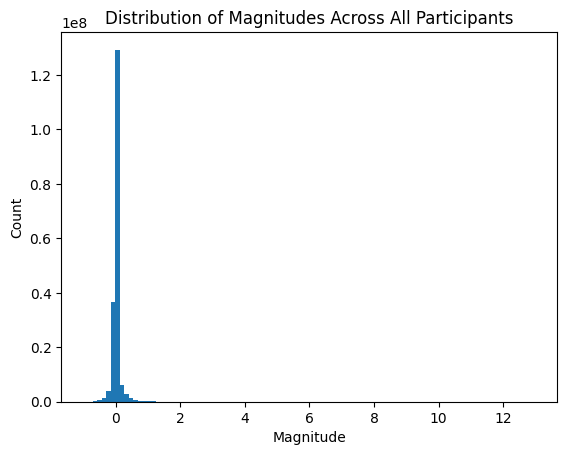

The most frequent bin is between -0.01 and 0.13


In [9]:
plt.hist(all_M_norm_sample, bins=100)
plt.xlabel("Magnitude")
plt.ylabel("Count")
plt.title("Distribution of Magnitudes Across All Participants")
plt.show()


lower, upper = get_most_frequent_bin(all_M_norm_sample, bins=100)
print(f"The most frequent bin is between {lower:.2f} and {upper:.2f}")

In [10]:
calculate_statistics(all_M_norm_sample)

/home/hrs675/Wearables_Tokenizer/.venv/lib64/python3.9/site-packages/numpy/_core/fromnumeric.py:3800: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Minimum Magnitude: -0.990683609
Maximum Magnitude: 12.977583
Mean Magnitude: 0.01273608625095606
Standard Deviation: Magnitude    0.154613
dtype: float64
Median Magnitude: 0.00022079999999990996
Range: 13.968266608999999
IQR: 0.023124330000000026
95% Confidence Interval: (Magnitude   -0.29649
dtype: float64, Magnitude    0.321962
dtype: float64)


<h4>Magnitude by Activity 

In [11]:
sleep_indx= np.where(all_Y_sample == 'sleep')[0]

In [12]:
sit_indx= np.where(all_Y_sample == 'sit-stand')[0]

In [13]:
sit_indx_array = np.array(sit_indx)
sleep_indx_array = np.array(sleep_indx)

# Flatten both arrays and then concatenate
rest_indx = np.concatenate([sit_indx_array.ravel(), sleep_indx_array.ravel()])


<h5> Sitting

In [14]:
print(len(all_M_norm_sample))
print(len(rest_indx))


184349280
139932052


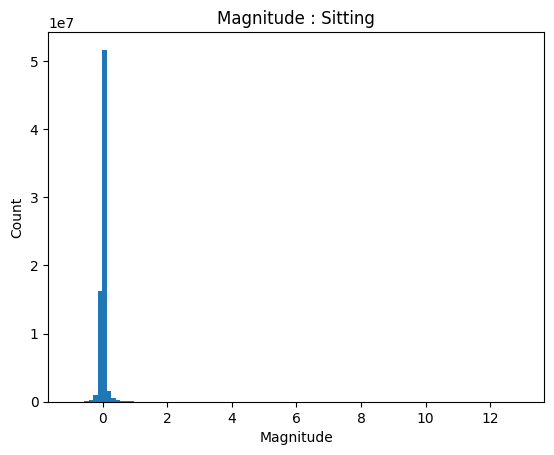

In [15]:

plt.hist(all_M_norm_sample.iloc[sit_indx], bins=100)
plt.xlabel("Magnitude")
plt.ylabel("Count")
plt.title("Magnitude : Sitting")
plt.show()


In [16]:
print("Sitting \n")
calculate_statistics(all_M_norm_sample.iloc[sit_indx])

lower, upper = get_most_frequent_bin(all_M_norm_sample.iloc[sit_indx], bins=100)
print(f"The most frequent bin is between {lower:.2f} and {upper:.2f}")

Sitting 

Minimum Magnitude: -0.990683609
Maximum Magnitude: 12.972816
Mean Magnitude: 0.0037193690380191114
Standard Deviation: Magnitude    0.098599
dtype: float64
Median Magnitude: -0.00028205000000003366
Range: 13.963499609
IQR: 0.024310500000000124
95% Confidence Interval: (Magnitude   -0.193479
dtype: float64, Magnitude    0.200918
dtype: float64)
The most frequent bin is between -0.01 and 0.13


Sleep

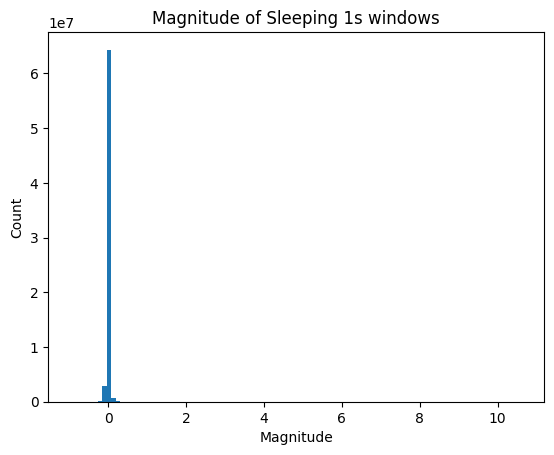

In [17]:
plt.hist(all_M_norm_sample.iloc[sleep_indx], bins=100)
plt.xlabel("Magnitude")
plt.ylabel("Count")
plt.title("Magnitude of Sleeping 1s windows")
plt.show()

In [18]:
print("Sleeping \n")

calculate_statistics(all_M_norm_sample.iloc[sleep_indx])

lower, upper = get_most_frequent_bin(all_M_norm_sample.iloc[sleep_indx], bins=100)
print(f"The most frequent bin is between {lower:.2f} and {upper:.2f}")

Sleeping 

Minimum Magnitude: -0.96345506
Maximum Magnitude: 10.615574
Mean Magnitude: -0.0013215526406464722
Standard Deviation: Magnitude    0.035149
dtype: float64
Median Magnitude: -0.00014139999999995823
Range: 11.57902906
IQR: 0.012315540000000014
95% Confidence Interval: (Magnitude   -0.07162
dtype: float64, Magnitude    0.068976
dtype: float64)
The most frequent bin is between -0.04 and 0.08


<h4>All Acitvities 

In [19]:
bike_indx= np.where(all_Y_sample == 'bicycling')[0]
walk_indx= np.where(all_Y_sample == 'walking')[0]                                               

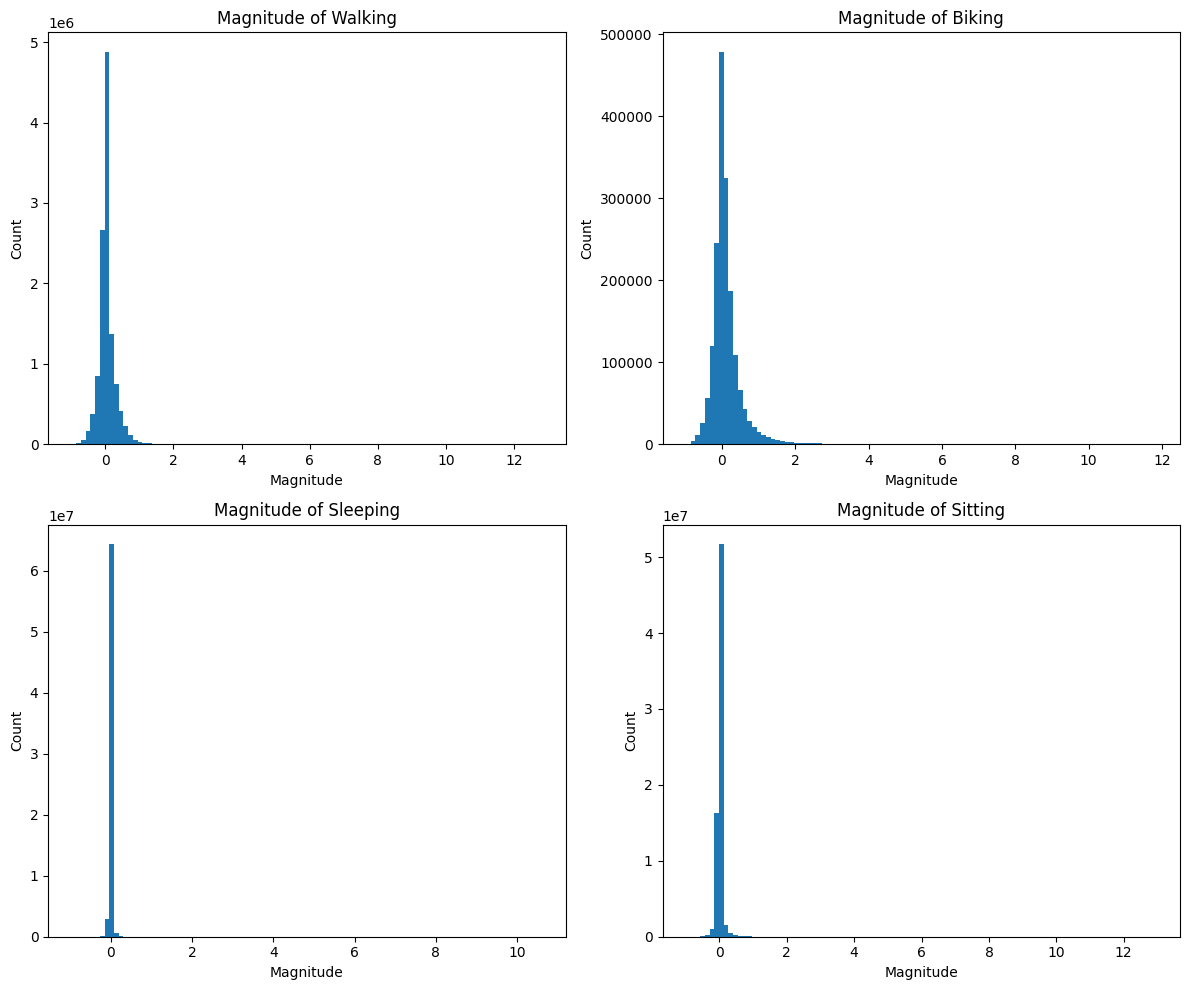

In [20]:
# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns

# Plot for walking
axes[0, 0].hist(all_M_norm_sample.iloc[walk_indx], bins=100)
axes[0, 0].set_xlabel("Magnitude")
axes[0, 0].set_ylabel("Count")
axes[0, 0].set_title("Magnitude of Walking")

# Plot for biking
axes[0, 1].hist(all_M_norm_sample.iloc[bike_indx], bins=100)
axes[0, 1].set_xlabel("Magnitude")
axes[0, 1].set_ylabel("Count")
axes[0, 1].set_title("Magnitude of Biking")

# Plot for sleeping
axes[1, 0].hist(all_M_norm_sample.iloc[sleep_indx], bins=100)
axes[1, 0].set_xlabel("Magnitude")
axes[1, 0].set_ylabel("Count")
axes[1, 0].set_title("Magnitude of Sleeping")

# Plot for sitting
axes[1, 1].hist(all_M_norm_sample.iloc[sit_indx], bins=100)
axes[1, 1].set_xlabel("Magnitude")
axes[1, 1].set_ylabel("Count")
axes[1, 1].set_title("Magnitude of Sitting")

# Adjust layout
plt.tight_layout()

In [23]:

lower, upper = get_most_frequent_bin(all_M_norm_sample.iloc[walk_indx], bins=100)
print(f"The most frequent bin is between {lower:.2f} and {upper:.2f}")



lower, upper = get_most_frequent_bin(all_M_norm_sample.iloc[bike_indx], bins=100)
print(f"The most frequent bin is between {lower:.2f} and {upper:.2f}")

The most frequent bin is between -0.02 and 0.12
The most frequent bin is between -0.08 and 0.05


<h4>Rest vs Active

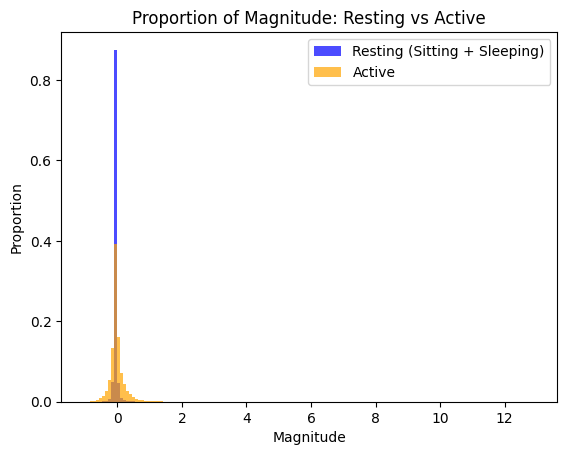

The most frequent bin for resting is between -0.05 and 0.04
The most frequent bin for active is between -0.05 and 0.04


In [24]:
# Find indices not in rest_indx (active indices)
all_indices = np.arange(len(all_M_norm_sample))
active_indx = np.setdiff1d(all_indices, rest_indx)

# Get scalar min and max for bin boundaries
min_val = min(
    all_M_norm_sample.min().min(),
    all_M_norm_sample.iloc[rest_indx].min().min(),
    all_M_norm_sample.iloc[active_indx].min().min()
)
max_val = max(
    all_M_norm_sample.max().max(),
    all_M_norm_sample.iloc[rest_indx].max().max(),
    all_M_norm_sample.iloc[active_indx].max().max()
)

# Define common bin boundaries
common_bins = np.linspace(min_val, max_val, 150)

# Compute histograms with the same bins
counts_rest, _ = np.histogram(all_M_norm_sample.iloc[rest_indx], bins=common_bins, density=False)
counts_active, _ = np.histogram(all_M_norm_sample.iloc[active_indx], bins=common_bins, density=False)

# Normalize to proportions
counts_rest = counts_rest / counts_rest.sum()
counts_active = counts_active / counts_active.sum()

# Plot histograms
plt.bar(common_bins[:-1], counts_rest, width=(common_bins[1] - common_bins[0]), alpha=0.7, color='blue', label="Resting (Sitting + Sleeping)")
plt.bar(common_bins[:-1], counts_active, width=(common_bins[1] - common_bins[0]), alpha=0.7, color='orange', label="Active")
plt.xlabel("Magnitude")
plt.ylabel("Proportion")
plt.title("Proportion of Magnitude: Resting vs Active")
plt.legend()
plt.show()

# Get the most frequent bin for resting
lower, upper = get_most_frequent_bin(all_M_norm_sample.iloc[rest_indx], bins=common_bins)
print(f"The most frequent bin for resting is between {lower:.2f} and {upper:.2f}")

# Get the most frequent bin for active
lower, upper = get_most_frequent_bin(all_M_norm_sample.iloc[active_indx], bins=common_bins)
print(f"The most frequent bin for active is between {lower:.2f} and {upper:.2f}")

In [ ]:
# Calculate density for resting group
rest_values = all_M_norm_sample.iloc[rest_indx].values.flatten()
density_rest = gaussian_kde(rest_values)
x_rest = np.linspace(rest_values.min(), rest_values.max(), 1000)
y_rest = density_rest(x_rest)

# Calculate density for active group
active_values = all_M_norm_sample.iloc[active_indx].values.flatten()
density_active = gaussian_kde(active_values)
x_active = np.linspace(active_values.min(), active_values.max(), 1000)
y_active = density_active(x_active)

# Plot the density lines
plt.plot(x_rest, y_rest, label="Resting (Sitting + Sleeping)", color='blue')
plt.plot(x_active, y_active, label="Active", color='orange')
plt.xlabel("Magnitude")
plt.ylabel("Density")
plt.title("Density Plot: Resting vs Active")
plt.legend()
plt.show()

In [ ]:
# Use the sampled data and correct indexing
# Find indices not in rest_indx (active indices)
all_indices = np.arange(len(all_M_norm_sample))
active_indx = np.setdiff1d(all_indices, rest_indx)

# Define common bin boundaries using scalar min/max
min_val = min(
    all_M_norm_sample.min().min(),
    all_M_norm_sample.iloc[rest_indx].min().min(),
    all_M_norm_sample.iloc[active_indx].min().min()
)
max_val = max(
    all_M_norm_sample.max().max(),
    all_M_norm_sample.iloc[rest_indx].max().max(),
    all_M_norm_sample.iloc[active_indx].max().max()
)
common_bins = np.linspace(min_val, max_val, 150)

# Compute histograms with the same bins
counts_rest, _ = np.histogram(all_M_norm_sample.iloc[rest_indx], bins=common_bins, density=False)
counts_active, _ = np.histogram(all_M_norm_sample.iloc[active_indx], bins=common_bins, density=False)

# Find the bin index for the range -0.05 to 0.05
bin_index = np.where((common_bins[:-1] >= -0.05) & (common_bins[1:] <= 0.05))[0]

if len(bin_index) > 0:
    bin_index = bin_index[0]  # Get the first matching bin index

    # Replace the bin count with the value of the next bin
    counts_rest[bin_index] = counts_rest[bin_index + 1]
    counts_active[bin_index] = counts_active[bin_index + 1]

# Normalize to proportions
counts_rest = counts_rest / counts_rest.sum()
counts_active = counts_active / counts_active.sum()

# Compute bin centers for plotting
bin_centers = (common_bins[:-1] + common_bins[1:]) / 2

# Plot line plots
plt.plot(bin_centers, counts_rest, label="Resting (Sitting + Sleeping)", color='blue', linewidth=2)
plt.plot(bin_centers, counts_active, label="Active", color='orange', linewidth=2)
plt.xlabel("Magnitude")
plt.ylabel("Proportion")
plt.title("Proportion of Magnitude: Resting vs Active (Modified Bin)")
plt.legend()
plt.show()

In [ ]:
# Normalize to proportions
counts_rest = counts_rest / counts_rest.sum()
counts_active = counts_active / counts_active.sum()

# Compute bin centers for plotting
bin_centers = (common_bins[:-1] + common_bins[1:]) / 2

# Filter values between -1 and 2
mask = (bin_centers >= -1) & (bin_centers <= 2)
filtered_bin_centers = bin_centers[mask]
filtered_counts_rest = counts_rest[mask]
filtered_counts_active = counts_active[mask]

# Calculate statistics for resting
mean_rest = np.mean(all_M_norm_sample.iloc[rest_indx])
median_rest = np.median(all_M_norm_sample.iloc[rest_indx])
std_rest = np.std(all_M_norm_sample.iloc[rest_indx])

# Calculate statistics for active
mean_active = np.mean(all_M_norm_sample.iloc[active_indx])
median_active = np.median(all_M_norm_sample.iloc[active_indx])
std_active = np.std(all_M_norm_sample.iloc[active_indx])

# Plot line plots for the filtered range
plt.plot(filtered_bin_centers, filtered_counts_rest, label="Resting (Sitting + Sleeping)", color='blue', linewidth=2)
plt.plot(filtered_bin_centers, filtered_counts_active, label="Active", color='orange', linewidth=2)

# Add vertical lines for resting statistics
plt.axvline(mean_rest, color='blue', linestyle='--', label="Resting Mean")
plt.axvline(median_rest, color='blue', linestyle=':', label="Resting Median")
plt.axvline(mean_rest - std_rest, color='blue', linestyle='-.', label="Resting ±1 Std Dev")
plt.axvline(mean_rest + std_rest, color='blue', linestyle='-.')
plt.axvline(mean_rest - 2 * std_rest, color='blue', linestyle='-', label="Resting ±2 Std Dev")
plt.axvline(mean_rest + 2 * std_rest, color='blue', linestyle='-')

# Add vertical lines for active statistics
plt.axvline(mean_active, color='orange', linestyle='--', label="Active Mean")
plt.axvline(median_active, color='orange', linestyle=':', label="Active Median")
plt.axvline(mean_active - std_active, color='orange', linestyle='-.', label="Active ±1 Std Dev")
plt.axvline(mean_active + std_active, color='orange', linestyle='-.')
plt.axvline(mean_active - 2 * std_active, color='orange', linestyle='-', label="Active ±2 Std Dev")
plt.axvline(mean_active + 2 * std_active, color='orange', linestyle='-')

# Add labels, title, and legend
plt.xlabel("Magnitude")
plt.ylabel("Proportion")
plt.title("Proportion of Magnitude: Resting vs Active (Filtered Range)")
plt.legend()
plt.show()